In [91]:
import numpy as np
import os
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [8]:
df = pd.read_csv('data/CARS.csv')

In [9]:
df["MSRP"] = df["MSRP"].replace('[\$,]', '', regex=True).astype(float)

In [10]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [11]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


## Punto 3.1.1

In [149]:
category = df['Make'].value_counts()

fig = px.bar(df, x=category.index, y=category.values, title='Make')
fig.update_traces(text = category.values, textposition='outside')
fig.update_layout(xaxis_title='Category', yaxis_title='count')
fig.show()

In [150]:
category = df['Type'].value_counts()

fig = px.bar(df, x=category.index, y=category.values, title='Type')
fig.update_traces(text = category.values, textposition='outside')
fig.update_layout(xaxis_title='Category', yaxis_title='count')
fig.show()

In [151]:
category = df['Origin'].value_counts()

fig = px.bar(df, x=category.index, y=category.values, title='Origin')
fig.update_traces(text = category.values, textposition='outside')
fig.update_layout(xaxis_title='Category', yaxis_title='count')
fig.show()

In [152]:
category = df['DriveTrain'].value_counts()

fig = px.bar(df, x=category.index, y=category.values, title='Origin')
fig.update_traces(text = category.values, textposition='outside')
fig.update_layout(xaxis_title='Category', yaxis_title='count')
fig.show()

## 3.1.2

<Axes: >

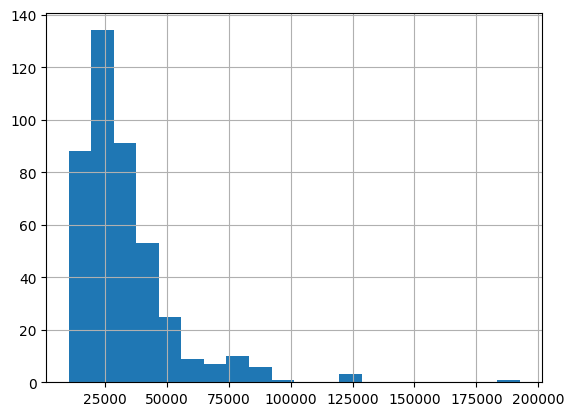

In [28]:
df["MSRP"].hist(bins=30)

<Axes: >

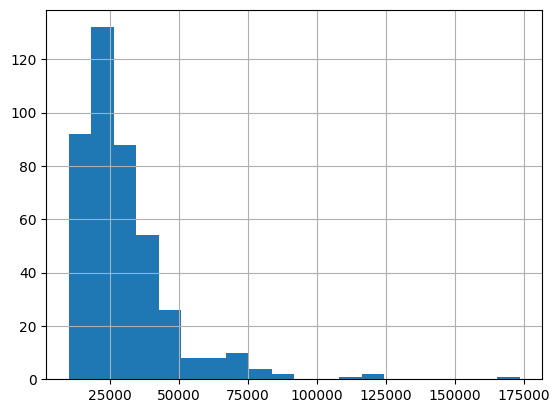

In [36]:
df["Invoice"].hist(bins=20)

<Axes: >

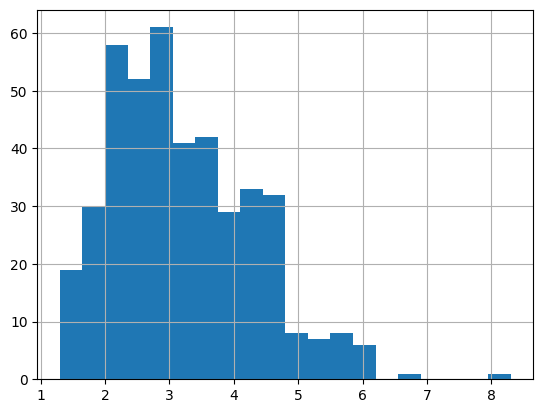

In [37]:
df["EngineSize"].hist(bins=20)

<Axes: >

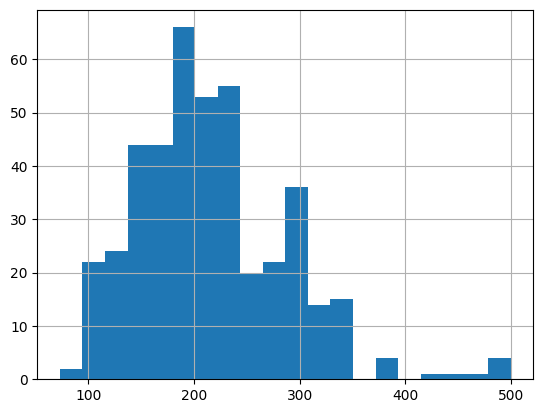

In [38]:
df["Horsepower"].hist(bins=20)

<Axes: >

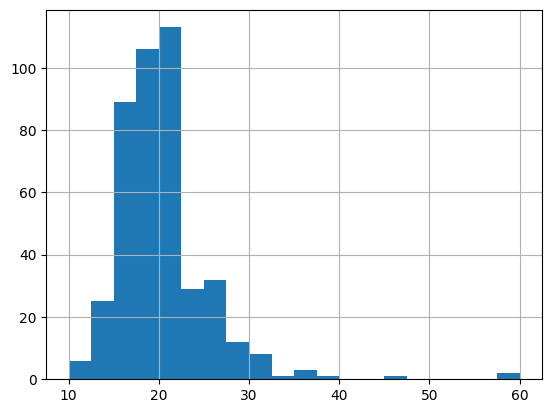

In [39]:
df["MPG_City"].hist(bins=20)

<Axes: >

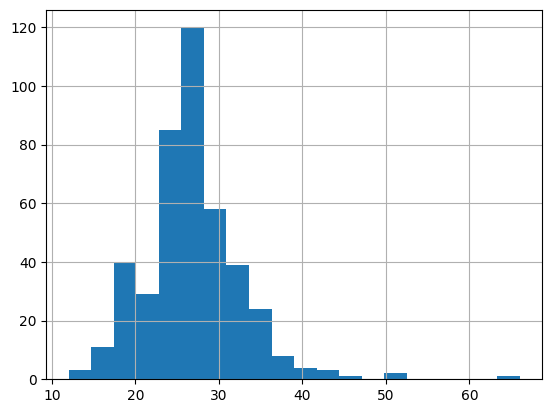

In [40]:
df["MPG_Highway"].hist(bins=20)

<Axes: >

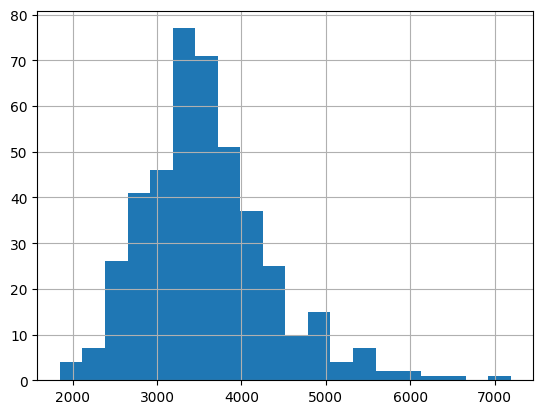

In [41]:
df["Weight"].hist(bins=20)

<Axes: >

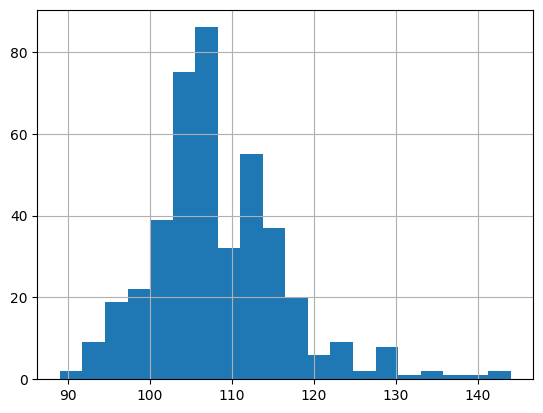

In [42]:
df["Wheelbase"].hist(bins=20)

<Axes: >

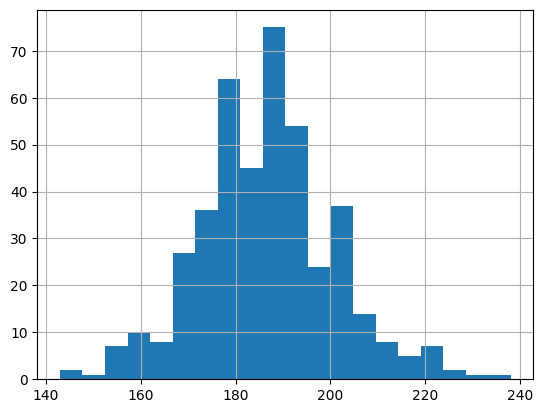

In [43]:
df["Length"].hist(bins=20)

<Axes: >

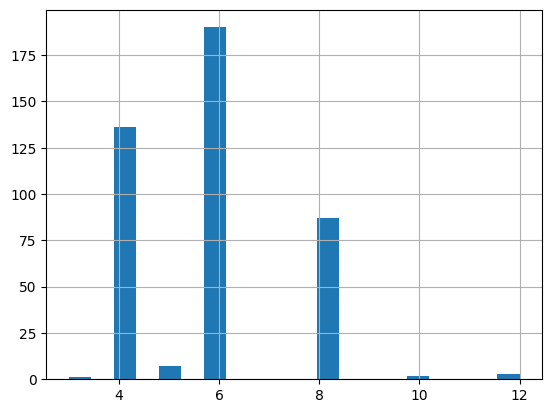

In [127]:
df["Cylinders"].hist(bins=20)

In [60]:
df.query('MSRP > (32774.855140 + (5 * 19409.002794)) or MSRP < (32774.855140 - (5 * 19409.002794))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
334,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477,17,24,3131,93,175


In [63]:
df.query('Invoice > (30014.700934 + (5 * 17621.495747)) or Invoice < (30014.700934 - (5 * 17621.495747))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
262,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600.0,5.5,12.0,493,13,19,4473,114,196
334,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560.0,3.6,6.0,477,17,24,3131,93,175


In [72]:
df.query('EngineSize > (3.196728 + (5 * 1.107298)) or EngineSize < (3.196728 - (5 * 1.107298))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
114,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,81795.0,74451.0,8.3,10.0,500,12,20,3410,99,176


In [71]:
df.query('Horsepower > (215.885514 + (5 * 71.752061)) or Horsepower < (215.885514 - (5 * 71.752061))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [75]:
df.query('MPG_City > (20.060747 + (5 * 5.23209)) or MPG_City < (20.060747 - (5 * 5.23209))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110.0,17911.0,2.0,3.0,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110,59,51,2890,106,175


In [78]:
df.query('MPG_Highway > (26.843457 + (5 * 5.734489)) or MPG_Highway < (26.843457 - (5 * 5.734489))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110.0,17911.0,2.0,3.0,73,60,66,1850,95,155


In [81]:
df.query('Weight > (3577.953271 + (5 * 758.096033)) or Weight < (3577.953271 - (5 * 758.096033))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [84]:
df.query('Wheelbase > (108.154205 + (5 * 8.302097)) or Wheelbase < (108.154205 - (5 * 8.302097))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [86]:
df.query('Length > (186.362149 + (5 * 8.302097)) or Length < (186.362149 - (5 * 8.302097))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
87,Chevrolet,Silverado SS,Truck,USA,All,40340.0,35399.0,6.0,8.0,300,13,17,4804,144,238
146,GMC,Sierra Extended Cab 1500,Truck,USA,Rear,25717.0,22604.0,4.8,8.0,285,17,20,4548,144,230
238,MINI,Cooper,Sedan,Europe,Front,16999.0,15437.0,1.6,4.0,115,28,37,2524,97,143
239,MINI,Cooper S,Sedan,Europe,Front,19999.0,18137.0,1.6,4.0,163,25,34,2678,97,144


In [126]:
df.query('Cylinders > (5.807511 + (5 * 1.556612)) or Cylinders < (5.807511 - (5 * 1.556612))')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [105]:
def test(data):
    stat, p = normaltest(df[data])

    alpha = 0.05
    
    if p > alpha:
        print('Los datos parecen seguir una distribución normal')
    else:
        print('Los datos no parecen seguir una distribución normal')

In [106]:
test("MSRP")

Los datos no parecen seguir una distribución normal


In [107]:
test("Invoice")

Los datos no parecen seguir una distribución normal


In [108]:
test("EngineSize")

Los datos no parecen seguir una distribución normal


In [109]:
test("Horsepower")

Los datos no parecen seguir una distribución normal


In [110]:
test("MPG_City")

Los datos no parecen seguir una distribución normal


In [111]:
test("MPG_Highway")

Los datos no parecen seguir una distribución normal


In [112]:
test("Weight")

Los datos no parecen seguir una distribución normal


In [113]:
test("Wheelbase")

Los datos no parecen seguir una distribución normal


In [114]:
test("Length")

Los datos no parecen seguir una distribución normal


In [118]:
test("Cylinders")

Los datos no parecen seguir una distribución normal


## 3.2

In [155]:
fig = px.box(df, x="Type", y="MPG_City")
fig.show()

* Como se ve en el boxsplot se puede ver que la mayoria de los datos es prenseta dentro de los cuartiles, pero en el caso del Sedan se ven varios valores outliers auque hay valoers que pasan hasta el rango limite de los bigotes de la caja y en el caso de carros hibridos se puede ver que la mayoria de los datos se encuentra en el cuartil 1.

In [156]:
box_plot = px.box(df, x="Make", y="MPG_City")
box_plot.show()

* En este caso las graficas so mas diferentes entre cada uno, en algunos caso como e honda se ve solo un outlier, pero en otros casos como Kia se ve que la mayoria de los datos estan en el cuartil 1, en la mayoria de los datos se ve que el boxsplot valores muy variados donde se puede ver que en algunos hay mas de un caso donde si hay varios outliers y en otros caso no. En resumen si comparamos la columna make y MPG_City es que algunos valores las millas por galon en promedio de los vehiculos es muy similar en todas las marcas, solo hay algunas que cambia mucho este valor.

In [169]:
box_plot = px.box(df, x="Origin", y="MPG_City")
box_plot.show()

* En este caso se ve que los calores de Origin con respecto a MPG_City en promedio son valores muy similares, lo que significa que la eficiecia de las millas por galon de los vehiculos no tiene que ver con el lugar donde fueron constriudos, pero en los tres casos si se puede ver que presentann varios outliers.

In [158]:
box_plot = px.box(df, x="DriveTrain", y="MPG_City")
box_plot.show()

* En este caso el boxplot se Front se puede ver que presenta varios outliers lo que hace que hay varios datos que presentan datos no tan fiables, lo mismo para el Rear que se puede ver que tieen varios outliers en la parte inferior y superior, lo cual como el anterior muchos datos no son una muesta fiable de esa columna, en cambio enn All se puede ver que los datos no presenta outliers, por lo cual son datos mas fiables, al momento de comparar los datos.

## 3.2.2

In [161]:
scatter_Plot = px.scatter(df, x="MSRP", y="MPG_City")
scatter_Plot.show()

* Como se puede ver en el scatterplot la mayoria de los datos se presenta en una misma region, lo cual muestra que el precio de los vehiculo con respecto a la millas por galon es muy similarn, en algunos casos se ve que por un precio similar se presenta mucho mejor rendimiento en los galones y tambien se puede entennder que el precio no interviene tanto enn las millas por galon.

In [162]:
scatter_Plot = px.scatter(df, x="Invoice", y="MPG_City")
scatter_Plot.show()

* Como se ve en la grafica es muy similar al caso anteriorlos valores de lo vehiculos por el precio que le dan los concesionarios no varia en mayor medida con el rendimiento de la gasolina en la ciudad.

In [163]:
scatter_Plot = px.scatter(df, x="EngineSize", y="MPG_City")
scatter_Plot.show()

* En este caso si se ve un cambio grade entre el tamaño del motor y el rendimietno de la gasolina, como se ve en la grafica mientras el motor es mas grande mas consumo de gasolina tiene y mientras mas pequeño menos consumo presennta, se ve que esto depende mas que todo solo en el tamaño del motor y no la marca del vehiculo.

In [165]:
scatter_Plot = px.scatter(df, x="Horsepower", y="MPG_City")
scatter_Plot.show()

In [164]:
scatter_Plot = px.scatter(df, x="Cylinders", y="MPG_City")
scatter_Plot.show()

* En este caso se ve una relacion directa entre la cantidad de los cilindros y el rendimiento de la gasolina, donde se ve que mientras mas silindros tenga meons rendimiento tiene la gasolina y non solo eso, tambien son menos los motores con 8 cilindros o mas.

In [166]:
scatter_Plot = px.scatter(df, x="MPG_Highway", y="MPG_City")
scatter_Plot.show()

* En la grafica se esta comparando el rendimiento de la gasolina en ciudad comparado con el redimiento de la gasolina en autopista, los cual nos lleva a ver que la mayoria de los boton estan entre 20 y 30 del eje x y que se mantiene un rendimiento similar entre las millas en ciudad que las millas enn ciudad.

In [167]:
scatter_Plot = px.scatter(df, x="Wheelbase", y="MPG_City")
scatter_Plot.show()

* Se puede ver que entre el rendimiento de la gasolina contra el largo del vehiculo es que si hay una relacion entre el rendimiento y el largo del vehiculo, lo cual muestra que mientras mas largo del vehiculo menos rendimiento de la gasolina en ciudad.

In [168]:
scatter_Plot = px.scatter(df, x="Length", y="MPG_City")
scatter_Plot.show()

* Cuando comparamos el tamaño del vehiculo con el redimiento del motor, afecta en algunos casos, pero en otros no tanto, porque como se ve entre los valores de 160 a 180 los valores son muy similares, pero hay casos donde baja mucho el rendimiento y en otros casos si tiene mucho rendimiento, por lo cual no es un valor que afecte mucho el rendimiento de la gasolina.

## 3.3

### 3.3.1

In [175]:
matriz_correlation = pd.DataFrame(df[["MSRP","Invoice","EngineSize","Horsepower","Cylinders","MPG_Highway","MPG_City"]])
matriz_correlation.corr()

,MSRP,Invoice,EngineSize,Horsepower,Cylinders,MPG_Highway,MPG_City
MSRP,1.000000,0.999132,0.571753,0.826945,0.649742,-0.439622,-0.475020
Invoice,0.999132,1.000000,0.564498,0.823746,0.645226,-0.434585,-0.470442
EngineSize,0.571753,0.564498,1.000000,0.787435,0.908002,-0.717302,-0.709471
Horsepower,0.826945,0.823746,0.787435,1.000000,0.810341,-0.647195,-0.676699
Cylinders,0.649742,0.645226,0.908002,0.810341,1.000000,-0.676100,-0.684402
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.647195,-0.676100,1.000000,0.941021
MPG_City,-0.475020,-0.470442,-0.709471,-0.676699,-0.684402,0.941021,1.000000


* Las variables mas importante para explicar la variablidad de la son las variables de tamaño del motor, los caballos de fuerza, la cantidad de cilindros y las millas en autopista.
* El significado de una variable negativa o positiva es que las variables positivas significa que cuando alguna de las dos variables tiende a aumentar la otra tambien aumenta, en cambio una relacion negativa siginifica que si la variable va a aumentar la otra va a disminuir y eso lo vemos con el scatterplot que las variables que se nombraron son las que mas hace variar y por ejemplo como se vio enn el scatterplot es que si el tamaño del motor aumenta significa que el rendimiento de la gasolina en ciudad baja.

### 3.3.2

In [198]:
dummies = pd.DataFrame(df[["Make","Type","Origin","DriveTrain"]])
dummy = pd.get_dummies(dummies[["Make","Type","Origin","DriveTrain"]])
dummy.corr()

,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,Make_Honda,Make_Hummer,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_MINI,Make_Mazda,Make_Mercedes-Benz,Make_Mercury,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Pontiac,Make_Porsche,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Type_Hybrid,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
Make_Acura,1.000000,-0.027792,-0.028549,-0.018898,-0.017796,-0.033459,-0.024574,-0.022822,-0.030729,-0.017796,-0.026225,-0.006240,-0.021900,-0.017796,-0.008835,-0.021900,-0.010834,-0.020943,-0.010834,-0.020943,-0.018898,-0.008835,-0.020943,-0.032793,-0.018898,-0.022822,-0.026225,-0.010834,-0.020943,-0.016627,-0.016627,-0.017796,-0.008835,-0.020943,-0.017796,-0.034116,-0.024574,-0.021900,-0.010834,0.000992,0.027029,0.011490,-0.031428,-0.035402,0.168563,-0.081886,-0.093264,-0.022631,0.048108,-0.033684
Make_Audi,-0.027792,1.000000,-0.047720,-0.031589,-0.029746,-0.055927,-0.041076,-0.038147,-0.051363,-0.029746,-0.043835,-0.010430,-0.036607,-0.029746,-0.014768,-0.036607,-0.018108,-0.035006,-0.018108,-0.035006,-0.031589,-0.014768,-0.035006,-0.054814,-0.031589,-0.038147,-0.043835,-0.018108,-0.035006,-0.027792,-0.027792,-0.029746,-0.014768,-0.035006,-0.029746,-0.057025,-0.041076,-0.036607,-0.018108,-0.087030,0.031875,0.065012,-0.052533,0.029691,-0.164878,0.339401,-0.155891,0.218596,-0.068914,-0.126765
Make_BMW,-0.028549,-0.047720,1.000000,-0.032449,-0.030557,-0.057451,-0.042194,-0.039186,-0.052762,-0.030557,-0.045029,-0.010714,-0.037604,-0.030557,-0.015170,-0.037604,-0.018602,-0.035959,-0.018602,-0.035959,-0.032449,-0.015170,-0.035959,-0.056307,-0.032449,-0.039186,-0.045029,-0.018602,-0.035959,-0.028549,-0.028549,-0.030557,-0.015170,-0.035959,-0.030557,-0.058578,-0.042194,-0.037604,-0.018602,-0.025628,0.017199,0.059463,-0.053963,-0.017425,-0.169368,0.348644,-0.160137,0.018889,-0.234187,0.249780
Make_Buick,-0.018898,-0.031589,-0.032449,1.000000,-0.020227,-0.038030,-0.027931,-0.025940,-0.034926,-0.020227,-0.029807,-0.007093,-0.024892,-0.020227,-0.010042,-0.024892,-0.012313,-0.023804,-0.012313,-0.023804,-0.021480,-0.010042,-0.023804,-0.037272,-0.021480,-0.025940,-0.029807,-0.012313,-0.023804,-0.018898,-0.018898,-0.020227,-0.010042,-0.023804,-0.020227,-0.038776,-0.027931,-0.024892,-0.012313,0.034631,0.049818,-0.052698,-0.035721,-0.040238,-0.112114,-0.093072,0.202632,-0.037048,0.105939,-0.086198
Make_Cadillac,-0.017796,-0.029746,-0.030557,-0.020227,1.000000,-0.035812,-0.026302,-0.024427,-0.032889,-0.019048,-0.028069,-0.006679,-0.023440,-0.019048,-0.009457,-0.023440,-0.011595,-0.022416,-0.011595,-0.022416,-0.020227,-0.009457,-0.022416,-0.035099,-0.020227,-0.024427,-0.028069,-0.011595,-0.022416,-0.017796,-0.017796,-0.019048,-0.009457,-0.022416,-0.019048,-0.036515,-0.026302,-0.023440,-0.011595,0.043653,-0.031766,0.004557,0.041347,-0.037891,-0.105576,-0.087644,0.190816,-0.030222,0.026806,-0.002214
Make_Chevrolet,-0.033459,-0.055927,-0.057451,-0.038030,-0.035812,1.000000,-0.049452,-0.045926,-0.061837,-0.035812,-0.052773,-0.012557,-0.044071,-0.035812,-0.017780,-0.044071,-0.021801,-0.042144,-0.021801,-0.042144,-0.038030,-0.017780,-0.042144,-0.065991,-0.038030,-0.045926,-0.052773,-0.021801,-0.042144,-0.033459,-0.033459,-0.035812,-0.017780,-0.042144,-0.035812,-0.068653,-0.049452,-0.044071,-0.021801,0.005950,-0.030138,-0.032934,0.145619,-0.033598,-0.198498,-0.164783,0.358760,-0.018804,0.072057,-0.064642
Make_Chrysler,-0.024574,-0.041076,-0.042194,-0.027931,-0.026302,-0.049452,1.000000,-0.033730,-0.045416,-0.026302,-0.038759,-0.009223,-0.032368,-0.026302,-0.013058,-0.032368,-0.016012,-0.030953,-0.016012,-0.030953,-0.027931,-0.013058,-0.030953,-0.048467,-0.027931,-0.033730,-0.038759,-0.016012,-0.030953,-0.024574,-0.024574,-0.026302,-0.013058,-0.0

* En este caso la variable que posee mayor correlacion positiva son las de DriverTrian_Rear y Make_Mercedez_Benz.

In [207]:
dummies = pd.DataFrame(df[["Make","Type","Origin","DriveTrain"]])
dummy = pd.get_dummies(dummies[["Make","Type","Origin","DriveTrain"]])
dummy = np.delete(dummy, [0,2], axis=0)
dummy.corr()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [195]:
df.query('Model in["MDX","TSX 4dr"]')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
